In [1]:
import numpy as np
import jax.numpy as jnp
import jax
import matplotlib.pyplot as plt
from risks_and_discounts import phi_from_B, f_logreg, f_linreg, f_lip_phase_ret


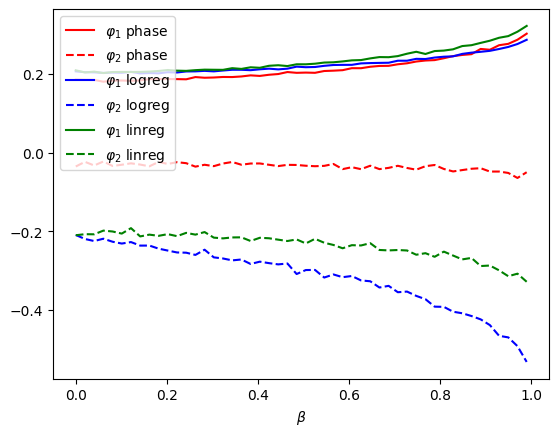

In [2]:
rho = 0.8
B = jnp.array([[10, rho], [rho, 1]])
betas = jnp.linspace(0,0.99)
key = jax.random.PRNGKey(1331)
n_samples = 50000


phase_col = 'red'
logreg_col = 'blue'
linreg_col = 'green'




phis = []
for beta in betas:
    key, subkey = jax.random.split(key)
    phis.append(phi_from_B(B, f_lip_phase_ret, beta,  subkey, n_samples=n_samples))
phis = np.array(phis)

phi1 = phis[:,0]
phi2 = phis[:,1]


plt.plot(betas, phi1, label = r'$\varphi_1$ phase', color = phase_col)
# plt.plot(betas, -phi1, label = 'neg phi1')
plt.plot(betas, phi2, label = r'$\varphi_2$ phase', color = phase_col, ls= '--')
plt.legend()



phis = []
for beta in betas:
    key, subkey = jax.random.split(key)
    phis.append(phi_from_B(B, f_logreg, beta,  subkey, n_samples=n_samples))
phis = np.array(phis)

phi1 = phis[:,0]
phi2 = phis[:,1]


plt.plot(betas, phi1, label = r'$\varphi_1$ logreg',color = logreg_col)
plt.plot(betas, phi2, label = r'$\varphi_2$ logreg',color = logreg_col, ls= '--')
plt.legend()


phis = []
for beta in betas:
    key, subkey = jax.random.split(key)
    phis.append(phi_from_B(B, f_linreg, beta,  subkey, n_samples=n_samples))
phis = np.array(phis)

phi1 = phis[:,0]
phi2 = phis[:,1]


plt.plot(betas, phi1, label = r'$\varphi_1$ linreg',color = linreg_col)
plt.plot(betas, phi2, label = r'$\varphi_2$ linreg',color = linreg_col, ls= '--')

plt.xlabel(r'$\beta$')
plt.legend(loc='upper left')
# plt.savefig('phis_vs_beta.pdf', format = 'pdf')
plt.show()